## **Import Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from pygam import LogisticGAM, s
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
pip install baseball-scraper

Note: you may need to restart the kernel to use updated packages.


## **Webscrape the Data**

In [3]:
from baseball_scraper import statcast
pitches_data = statcast(start_dt='2021-04-01', end_dt='2021-10-03')
pitches_data

This is a large query, it may take a moment to complete
Completed sub-query from 2021-04-01 to 2021-04-06
Completed sub-query from 2021-04-07 to 2021-04-12
Completed sub-query from 2021-04-13 to 2021-04-18
Completed sub-query from 2021-04-19 to 2021-04-24
Completed sub-query from 2021-04-25 to 2021-04-30
Completed sub-query from 2021-05-01 to 2021-05-06
Completed sub-query from 2021-05-07 to 2021-05-12
Completed sub-query from 2021-05-13 to 2021-05-18
Completed sub-query from 2021-05-19 to 2021-05-24
Completed sub-query from 2021-05-25 to 2021-05-30
Completed sub-query from 2021-05-31 to 2021-06-05
Completed sub-query from 2021-06-06 to 2021-06-11
Completed sub-query from 2021-06-12 to 2021-06-17
Completed sub-query from 2021-06-18 to 2021-06-23
Completed sub-query from 2021-06-24 to 2021-06-29
Completed sub-query from 2021-06-30 to 2021-07-05
Completed sub-query from 2021-07-06 to 2021-07-11
Completed sub-query from 2021-07-12 to 2021-07-17
Completed sub-query from 2021-07-18 to 2021-

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,2943,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019.0,519293.0,field_out,...,5.0,0.0,5.0,0.0,5.0,Infield shift,Strategic,148.0,0.000,-0.073
1,3124,SL,2021-10-03,80.6,1.60,6.64,"Smith, Will",596019.0,519293.0,NaN,...,5.0,0.0,5.0,0.0,5.0,Infield shift,Strategic,315.0,0.000,-0.027
2,3232,CU,2021-10-03,75.5,1.46,6.88,"Smith, Will",596019.0,519293.0,NaN,...,5.0,0.0,5.0,0.0,5.0,Infield shift,Standard,328.0,0.000,-0.020
3,3304,CU,2021-10-03,75.0,1.53,6.83,"Smith, Will",596019.0,519293.0,NaN,...,5.0,0.0,5.0,0.0,5.0,Standard,Standard,330.0,0.000,0.016
4,3511,FF,2021-10-03,91.2,1.49,6.66,"Smith, Will",607043.0,519293.0,field_out,...,5.0,0.0,5.0,0.0,5.0,Standard,Standard,143.0,0.002,-0.189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709846,21705,FF,2021-04-01,95.9,-1.92,6.15,"Márquez, Germán",605141.0,608566.0,NaN,...,0.0,0.0,0.0,0.0,0.0,Standard,Standard,212.0,0.000,-0.077
709847,21901,FF,2021-04-01,95.4,-1.69,6.17,"Márquez, Germán",605141.0,608566.0,NaN,...,0.0,0.0,0.0,0.0,0.0,Strategic,Standard,NaN,0.000,0.113
709848,21937,FF,2021-04-01,96.1,-1.76,6.27,"Márquez, Germán",605141.0,608566.0,NaN,...,0.0,0.0,0.0,0.0,0.0,Strategic,Standard,208.0,0.000,0.052
709849,22102,FF,2021-04-01,95.6,-2.04,6.03,"Márquez, Germán",605141.0,608566.0,NaN,...,0.0,0.0,0.0,0.0,0.0,Standard,Standard,195.0,0.000,-0.049


## **Data Preprocessing**

In [4]:
print(pitches_data.columns)

Index(['index', 'pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
     

In [5]:
pitches_in_play = pitches_data[pitches_data['events'].notnull()]

In [6]:
#pitches_data.to_csv('pitch_data.csv', index = False)

In [7]:
pitches_in_play['events'].unique()

array(['field_out', 'strikeout', 'grounded_into_double_play', 'single',
       'sac_bunt', 'walk', 'double', 'home_run', 'force_out', 'triple',
       'caught_stealing_2b', 'field_error', 'sac_fly', 'double_play',
       'hit_by_pitch', 'caught_stealing_home', 'fielders_choice',
       'fielders_choice_out', 'strikeout_double_play', 'other_out',
       'pickoff_3b', 'catcher_interf', 'sac_fly_double_play',
       'caught_stealing_3b', 'wild_pitch', 'passed_ball',
       'stolen_base_2b', 'pickoff_2b', 'pickoff_1b',
       'sac_bunt_double_play', 'pickoff_caught_stealing_2b',
       'game_advisory', 'triple_play', 'pickoff_caught_stealing_3b'],
      dtype=object)

In [8]:
home_runs = pitches_in_play[pitches_in_play['events'] == 'home_run']

In [9]:
home_runs['launch_angle'].head()

217    21.0
233    38.0
593    26.0
838    19.0
981    20.0
Name: launch_angle, dtype: float64

## **Exploratory Data Analysis**

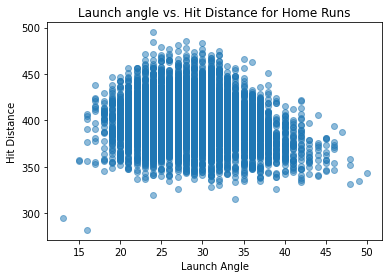

In [49]:
plt.scatter(home_runs['launch_angle'], home_runs['hit_distance_sc'], alpha=0.5)
plt.xlabel("Launch Angle")
plt.ylabel("Hit Distance")
plt.title("Launch angle vs. Hit Distance for Home Runs")
plt.show()

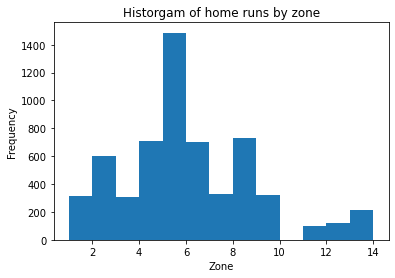

In [50]:
plt.hist(home_runs['zone'], bins = 13)
plt.xlabel("Zone")
plt.ylabel("Frequency")
plt.title("Historgam of home runs by zone")
plt.show()

In [12]:
pitches_in_play['home_run_bool'] = np.where(pitches_in_play['events'] == 'home_run', 1, 0)

<ipython-input-12-7e2878aaf1bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitches_in_play['home_run_bool'] = np.where(pitches_in_play['events'] == 'home_run', 1, 0)


In [13]:
# release_speed
# release_pos_x
# release_pos_z
# zone
# balls
# strikes
# pfx_x
# pfx_z
# plate_x
# plate_z
# outs_when_up
# inning
# vx0
# vy0
# vz0
# ax
# ay
# az
# hit_distance_sc
# launch_speed
# launch_angle
# release_spin

In [14]:
pitches_in_play.columns

Index(['index', 'pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
     

## **Model Selection & Construction**

In [15]:
pitches_in_play_subset = pitches_in_play[['release_speed', 'release_pos_x','release_pos_z', 'zone', 'balls', 'strikes', 'pfx_x', 'pfx_z' , 'plate_x', 'plate_z', 'outs_when_up' ,'inning' ,'vx0', 'vy0', 'vz0', 'ax', 'ay' ,'az', 'hit_distance_sc', 'launch_speed', 'launch_angle', 'release_spin_rate']]
pitches_in_play_subset = pitches_in_play_subset.fillna(pitches_in_play_subset.mean()) # fill NA values with column means

In [16]:
pitches_in_play

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,home_run_bool
0,2943,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019.0,519293.0,field_out,...,0.0,5.0,0.0,5.0,Infield shift,Strategic,148.0,0.000,-0.073,0
4,3511,FF,2021-10-03,91.2,1.49,6.66,"Smith, Will",607043.0,519293.0,field_out,...,0.0,5.0,0.0,5.0,Standard,Standard,143.0,0.002,-0.189,0
6,3811,SL,2021-10-03,80.3,1.81,6.55,"Smith, Will",641645.0,519293.0,strikeout,...,0.0,5.0,0.0,5.0,Standard,Standard,304.0,0.003,-0.152,0
9,2353,SI,2021-10-03,94.3,-1.20,6.05,"Gsellman, Robert",594807.0,607229.0,field_out,...,0.0,5.0,5.0,0.0,Infield shift,Standard,221.0,0.000,-0.061,0
12,2832,SL,2021-10-03,90.8,-1.48,5.95,"Gsellman, Robert",663586.0,607229.0,strikeout,...,0.0,5.0,5.0,0.0,Infield shift,Standard,215.0,0.000,-0.101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709828,19954,FF,2021-04-01,97.1,-1.83,6.26,"Márquez, Germán",571970.0,608566.0,field_out,...,0.0,0.0,0.0,0.0,Standard,Standard,201.0,0.042,-0.390,0
709833,20272,FF,2021-04-01,95.1,-1.97,6.20,"Márquez, Germán",641355.0,608566.0,walk,...,0.0,0.0,0.0,0.0,Standard,Standard,191.0,-0.010,0.141,0
709840,20944,SI,2021-04-01,95.8,-1.70,6.25,"Márquez, Germán",457759.0,608566.0,grounded_into_double_play,...,0.0,0.0,0.0,0.0,Standard,Standard,209.0,0.103,-0.566,0
709844,21375,FF,2021-04-01,96.2,-2.14,6.08,"Márquez, Germán",608369.0,608566.0,single,...,0.0,0.0,0.0,0.0,Infield shift,Standard,216.0,-0.052,0.700,0


In [17]:
# Initializing traing data for logistic regression model
# insert variables here
x_train = pitches_in_play_subset
y_train = pitches_in_play['home_run_bool']
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

In [18]:
# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
print(logistic_regression.fit(x_train, y_train).coef_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[-8.65163753e-02 -9.47135380e-03 -3.87334549e-02 -4.70299353e-02
   1.46257995e-02  1.27164938e-03  1.40793918e-03 -1.40997654e-02
  -2.13927170e-03 -7.50555237e-03  5.99560664e-04 -1.46100390e-02
   2.20459425e-02  1.26348223e-01 -1.69300547e-02 -2.84275572e-03
   7.65761245e-02  1.18231472e-01  6.14742525e-02  1.02993926e-02
   3.91892535e-03 -6.51301180e-05]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
predicted_values = logistic_regression.predict(x_test)
conf_matrix = confusion_matrix(y_test,predicted_values)
print(conf_matrix)

[[52293   374]
 [  626  1112]]


In [20]:
# See which predicted values are right or wrong predictions
boolean_vector = predicted_values == y_test
    
# Find misclassification error
error = sum(boolean_vector == False)/len(boolean_vector)
error

0.018380663541953866

In [21]:
# Full Logistic GAM model
logistic_gam = LogisticGAM()
gam = logistic_gam.fit(x_train, y_train)
predicted_values = gam.predict(x_test)
predicted_values = predicted_values.astype(int)

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test,predicted_values)
print(conf_matrix)

[[52343   324]
 [  536  1202]]


In [23]:
# See which predicted values are right or wrong predictions
boolean_vector = predicted_values == y_test
    
# Find misclassification error
error = sum(boolean_vector == False)/len(boolean_vector)
error

0.015807370646080322

In [24]:
# Standardize Data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
scaler_2 = preprocessing.StandardScaler().fit(x_test)
x_test_scaled = scaler_2.transform(x_test)

In [25]:
# Neural networks
MLP = MLPClassifier(hidden_layer_sizes=(6,5,2), activation='logistic', solver = 'adam', 
                    batch_size=200, alpha=0.0001, learning_rate='adaptive', max_iter=1000,
                    random_state = 1)

MLP.fit(x_train_scaled,y_train)
predicted_values = MLP.predict(x_test_scaled)

In [26]:
conf_matrix = confusion_matrix(y_test,predicted_values)
print(conf_matrix)

[[52270   397]
 [  524  1214]]


In [27]:
# See which predicted values are right or wrong predictions
boolean_vector = predicted_values == y_test
    
# Find misclassification error
error = sum(boolean_vector == False)/len(boolean_vector)
error

0.01692859112213951

## **Additional Exploratory Data Analysis**

In [28]:
pitches_in_play['events'].unique()

array(['field_out', 'strikeout', 'grounded_into_double_play', 'single',
       'sac_bunt', 'walk', 'double', 'home_run', 'force_out', 'triple',
       'caught_stealing_2b', 'field_error', 'sac_fly', 'double_play',
       'hit_by_pitch', 'caught_stealing_home', 'fielders_choice',
       'fielders_choice_out', 'strikeout_double_play', 'other_out',
       'pickoff_3b', 'catcher_interf', 'sac_fly_double_play',
       'caught_stealing_3b', 'wild_pitch', 'passed_ball',
       'stolen_base_2b', 'pickoff_2b', 'pickoff_1b',
       'sac_bunt_double_play', 'pickoff_caught_stealing_2b',
       'game_advisory', 'triple_play', 'pickoff_caught_stealing_3b'],
      dtype=object)

In [29]:
BIP = pitches_in_play.loc[pitches_in_play['events'].isin(['single','double', 'triple', 'home_run', 'field_out', 
                                                          'grounded_into_double_play','sac_bunt', 'force_out', 
                                                          'field_error', 'sac_fly', 'double_play', 'fielders_choice', 
                                                          'fielders_choice_out', 'sac_fly_double_play','sac_bunt_double_play', 
                                                          'triple_play', 'other_out'])]
BIP.head()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,home_run_bool
0,2943,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019.0,519293.0,field_out,...,0.0,5.0,0.0,5.0,Infield shift,Strategic,148.0,0.000,-0.073,0
4,3511,FF,2021-10-03,91.2,1.49,6.66,"Smith, Will",607043.0,519293.0,field_out,...,0.0,5.0,0.0,5.0,Standard,Standard,143.0,0.002,-0.189,0
9,2353,SI,2021-10-03,94.3,-1.20,6.05,"Gsellman, Robert",594807.0,607229.0,field_out,...,0.0,5.0,5.0,0.0,Infield shift,Standard,221.0,0.000,-0.061,0
18,3638,SL,2021-10-03,90.5,-1.51,5.93,"Gsellman, Robert",645277.0,607229.0,field_out,...,0.0,5.0,5.0,0.0,Infield shift,Standard,216.0,-0.001,-0.173,0
27,2564,FF,2021-10-03,94.9,-2.71,6.38,"Martin, Chris",606299.0,455119.0,field_out,...,0.0,5.0,0.0,5.0,Standard,Standard,216.0,0.003,-0.163,0


In [30]:
BIP.columns

Index(['index', 'pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
     

In [31]:
# Modifying the dataframe for the columns I will use in the exploratory data analysis

BIP_EDA = BIP[['pitch_type', 'release_speed', 'zone', 'hit_distance_sc', 'launch_speed', 
               'launch_angle', 'release_spin_rate', 'home_run_bool']]

In [32]:
BIP_LA_EV_dist = BIP_EDA[['launch_angle', 'launch_speed', 'hit_distance_sc', 'home_run_bool']].dropna()
BIP_LA_EV_dist

,launch_angle,launch_speed,hit_distance_sc,home_run_bool
0,-13.0,95.2,13.0,0
4,-18.0,93.3,9.0,0
9,65.0,75.3,140.0,0
18,18.0,96.8,294.0,0
27,29.0,91.8,308.0,0
...,...,...,...,...
709825,-40.0,80.3,3.0,0
709828,-37.0,71.1,3.0,0
709840,28.0,38.8,1.0,0
709844,8.0,96.3,160.0,0


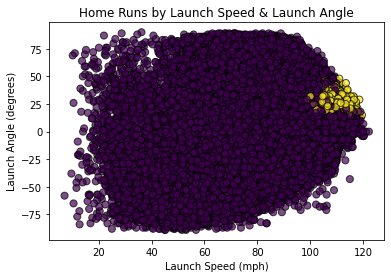

In [33]:
plt.scatter(BIP_LA_EV_dist['launch_speed'], BIP_LA_EV_dist['launch_angle'], 
            linewidths=1, alpha=.7,
           edgecolor='k',
           s = 50,
           c=BIP_LA_EV_dist['home_run_bool'])
plt.title('Home Runs by Launch Speed & Launch Angle')
plt.xlabel('Launch Speed (mph)')
plt.ylabel('Launch Angle (degrees)')
plt.show()

In [34]:
# This plot doesn't really help, so we will look at summary statistics to determine where we want to 
# filter for a better home run boolean average

BIP_LA_EV_dist['home_run_bool'].describe()

count    121319.000000
mean          0.048904
std           0.215668
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: home_run_bool, dtype: float64

In [35]:
BIP_HRbool = BIP_LA_EV_dist.groupby(['launch_angle', 'launch_speed']).mean().reset_index()
BIP_HRbool = BIP_HRbool[BIP_HRbool['home_run_bool'] > BIP_HRbool['home_run_bool'].mean()]

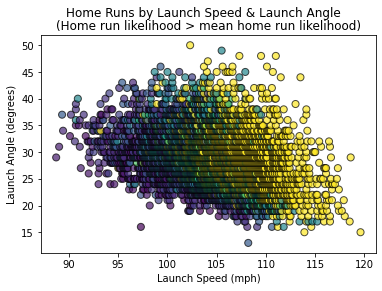

In [36]:
plt.scatter(BIP_HRbool['launch_speed'], BIP_HRbool['launch_angle'], 
            linewidths=1, alpha=.7,
           edgecolor='k',
           s = 50,
           c=BIP_HRbool['home_run_bool'])
plt.title('(Home run likelihood > mean home run likelihood)')
plt.suptitle('Home Runs by Launch Speed & Launch Angle')
plt.xlabel('Launch Speed (mph)')
plt.ylabel('Launch Angle (degrees)')
plt.show()

In [37]:
BIP_pitchtype = BIP[['pitch_type', 'home_run_bool']]
BIP_pitchtype = BIP_pitchtype.groupby(['pitch_type']).sum().reset_index()
BIP_pitchtype

,pitch_type,home_run_bool
0,CH,673
1,CS,1
2,CU,350
3,EP,1
4,FA,15
5,FC,425
6,FF,2407
7,FS,63
8,KC,86
9,KN,4


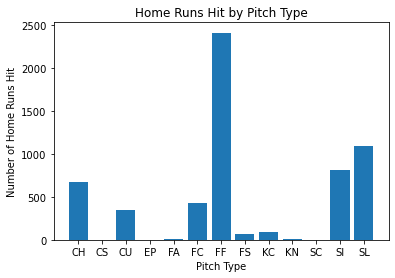

In [38]:
plt.bar(BIP_pitchtype['pitch_type'], BIP_pitchtype['home_run_bool'])
plt.title('Home Runs Hit by Pitch Type')
plt.xlabel('Pitch Type')
plt.ylabel('Number of Home Runs Hit')
plt.show()

In [39]:
pitch_types = pitches_data[['index', 'pitch_type']]
pitch_types['count'] = 1
pitch_types = pitch_types.groupby(['pitch_type']).sum().reset_index()
pitch_types

<ipython-input-39-cfd5f19ac369>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitch_types['count'] = 1


,pitch_type,index,count
0,CH,911796899,80410
1,CS,1717986,150
2,CU,669057589,57440
3,EP,599741,54
4,FA,10997894,747
5,FC,562394746,48202
6,FF,2911205934,249316
7,FS,118872712,11111
8,KC,167689466,14850
9,KN,510600,81


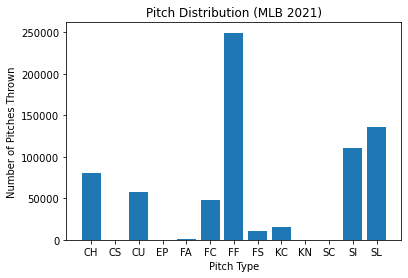

In [40]:
plt.bar(pitch_types['pitch_type'], pitch_types['count'])
plt.title('Pitch Distribution (MLB 2021)')
plt.xlabel('Pitch Type')
plt.ylabel('Number of Pitches Thrown')
plt.show()

In [42]:
pitch_types = pitch_types.set_index('pitch_type')
BIP_pitchtype = BIP_pitchtype.set_index('pitch_type')
hrproportions = pitch_types.join(BIP_pitchtype)

In [43]:
hrproportions['home_run_prop'] = (hrproportions['home_run_bool']/hrproportions['count'])

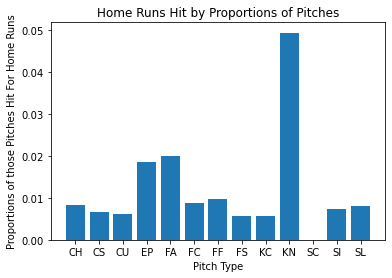

In [44]:
hrproportions = hrproportions.reset_index()
plt.bar(hrproportions['pitch_type'], hrproportions['home_run_prop'])
plt.title('Home Runs Hit by Proportions of Pitches')
plt.xlabel('Pitch Type')
plt.ylabel('Proportions of those Pitches Hit For Home Runs')
plt.show()

In [45]:
BIP_velo = BIP[['release_speed', 'home_run_bool']]
BIP_velo['release_speed'] = BIP_velo['release_speed'].round()
BIP_velo = BIP_velo.groupby(['release_speed']).sum().reset_index()
BIP_velo.head()

<ipython-input-45-a46c131b7c04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BIP_velo['release_speed'] = BIP_velo['release_speed'].round()


,release_speed,home_run_bool
0,30.0,0
1,33.0,0
2,38.0,0
3,39.0,0
4,40.0,0


In [46]:
BIP_velo = BIP_velo[BIP_velo['release_speed'] >= 70]

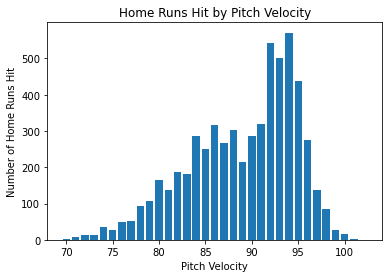

In [47]:
plt.bar(BIP_velo['release_speed'], BIP_velo['home_run_bool'])
plt.title('Home Runs Hit by Pitch Velocity')
plt.xlabel('Pitch Velocity')
plt.ylabel('Number of Home Runs Hit')
plt.show()